In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [9]:
Fueldata= pd.read_csv('C:/Users/Admin/Desktop/Data Scince Insaid/ML/linearR/Fuel Consumption.csv')
Fueldata.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2019,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.2,9.0,10.8,26,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210
4,2019,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,261


In [11]:
Fueldata.shape

(1022, 13)

In [12]:
Fueldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 13 columns):
MODELYEAR                   1022 non-null int64
MAKE                        1022 non-null object
MODEL                       1022 non-null object
VEHICLECLASS                1022 non-null object
ENGINESIZE                  1022 non-null float64
CYLINDERS                   1022 non-null int64
TRANSMISSION                1022 non-null object
FUELTYPE                    1022 non-null object
FUELCONSUMPTION_CITY        1022 non-null float64
FUELCONSUMPTION_HWY         1022 non-null float64
FUELCONSUMPTION_COMB        1022 non-null float64
FUELCONSUMPTION_COMB_MPG    1022 non-null int64
CO2EMISSIONS                1022 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 103.9+ KB


In [13]:
Fueldata.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1022.0,1022.000000,1022.000000,1022.000000,1022.00000,1022.000000,1022.000000,1022.000000
mean,2019.0,3.110861,5.588063,12.363209,9.02319,10.857730,27.683953,250.762231
std,0.0,1.320259,1.800961,3.306124,2.05046,2.705248,7.355990,57.054017
min,2019.0,1.000000,3.000000,4.200000,4.00000,4.100000,13.000000,96.000000
25%,2019.0,2.000000,4.000000,10.200000,7.60000,9.100000,23.000000,211.250000
50%,2019.0,3.000000,6.000000,12.000000,8.70000,10.600000,27.000000,247.500000
75%,2019.0,3.600000,6.000000,14.300000,10.20000,12.500000,31.000000,289.000000
max,2019.0,8.000000,16.000000,26.800000,17.20000,22.200000,69.000000,522.000000


In [14]:
fueldf = Fueldata[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
fueldf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,8.6,199
1,3.5,6,10.8,252
2,3.5,6,11.0,258
3,3.0,6,9.0,210
4,3.5,6,11.0,261
5,2.0,4,9.9,232
6,2.0,4,10.3,242
7,3.5,6,8.4,196
8,2.4,4,8.7,205


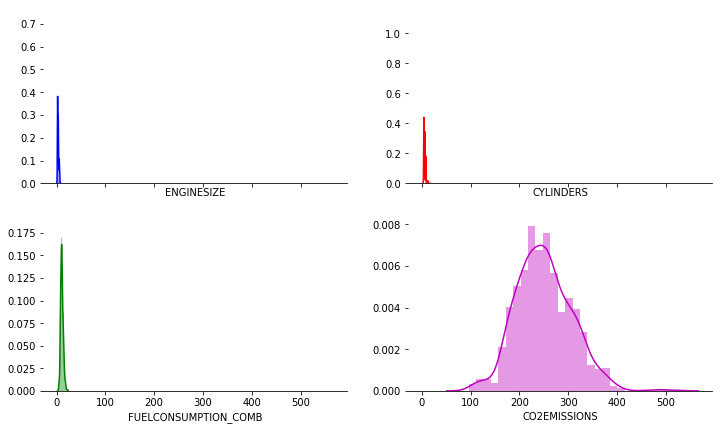

In [15]:
f, axes = plt.subplots(2, 2, figsize=(12,7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(Fueldata.ENGINESIZE , color="b", ax=axes[0, 0])

sns.distplot(Fueldata.CYLINDERS, color="r", ax=axes[0, 1])

sns.distplot(Fueldata.FUELCONSUMPTION_COMB, color="g", ax=axes[1, 0])

sns.distplot(Fueldata.CO2EMISSIONS, color="m", ax=axes[1, 1])


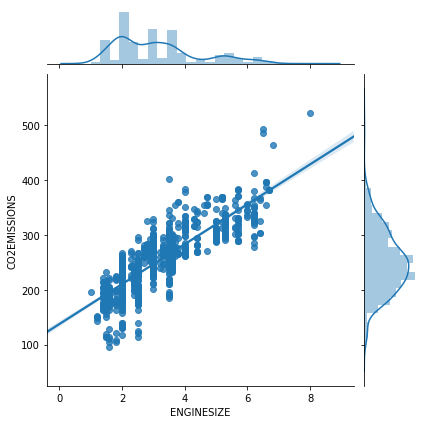

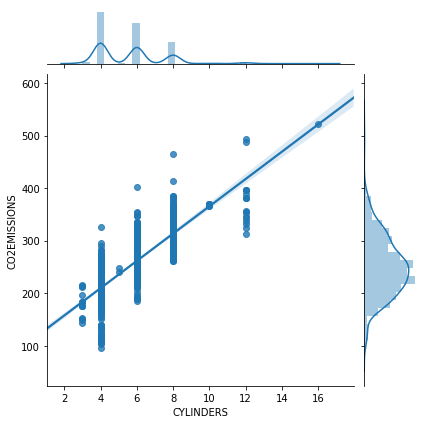

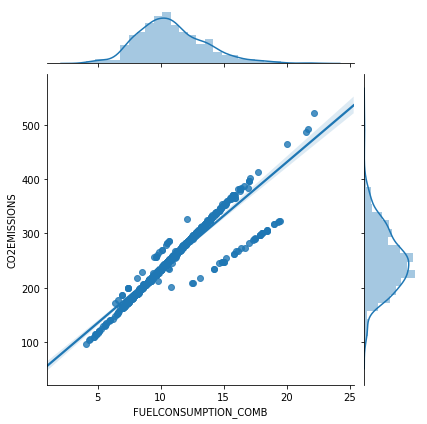

In [16]:
sns.jointplot("ENGINESIZE", "CO2EMISSIONS", data=fueldf, kind='reg')
sns.jointplot("CYLINDERS", "CO2EMISSIONS", data=fueldf, kind='reg')
sns.jointplot("FUELCONSUMPTION_COMB", "CO2EMISSIONS", data=fueldf, kind='reg')

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


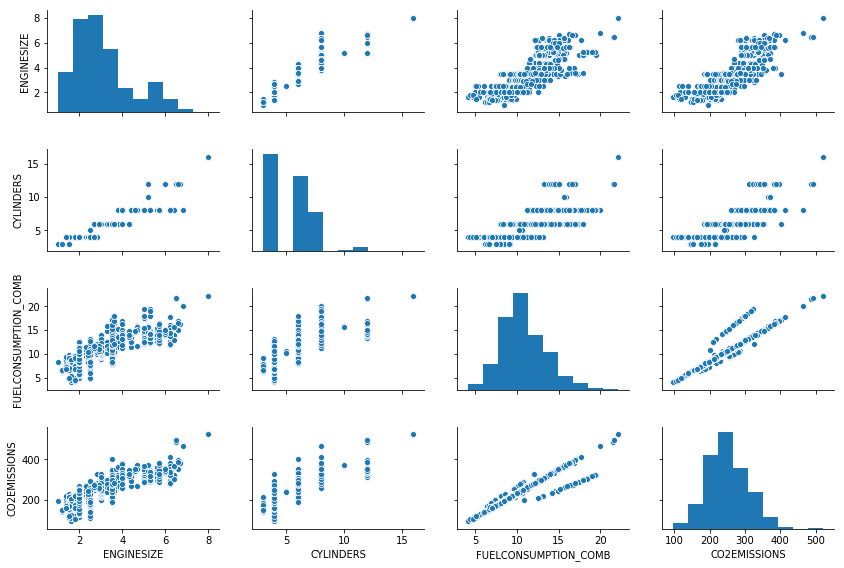

In [17]:
sns.pairplot(fueldf, size = 2, aspect = 1.5)

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


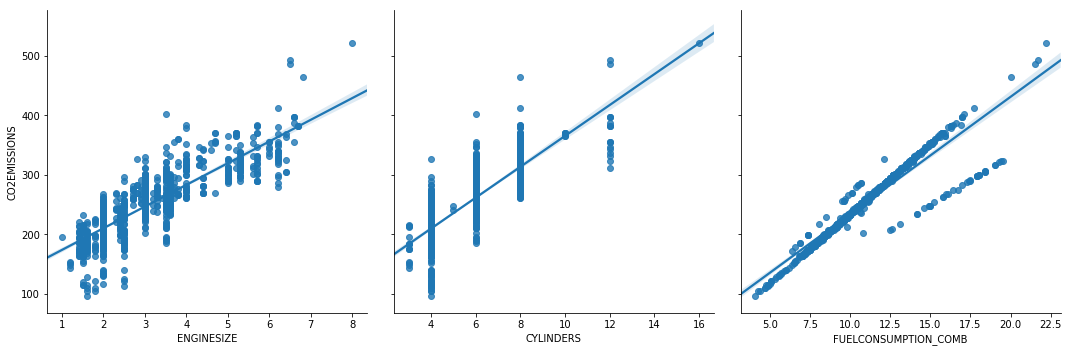

In [18]:
sns.pairplot(fueldf, x_vars=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB'], y_vars='CO2EMISSIONS', size=5, aspect=1, kind='reg')

In [19]:
fueldf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.924291,0.824478,0.843761
CYLINDERS,0.924291,1.000000,0.793610,0.820589
FUELCONSUMPTION_COMB,0.824478,0.793610,1.000000,0.936145
CO2EMISSIONS,0.843761,0.820589,0.936145,1.000000


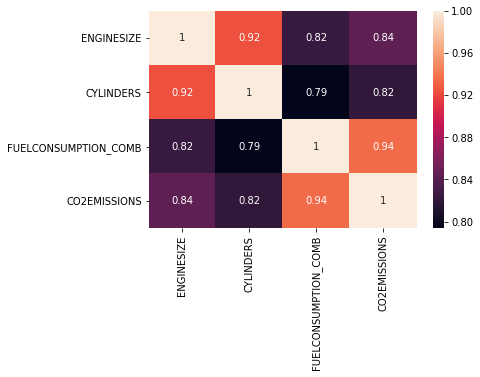

In [20]:
sns.heatmap(fueldf.corr(), annot=True );

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(fueldf)
fueldf1 = scaler.transform(fueldf)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
fdf = pd.DataFrame(fueldf1)
fdf.head()

,0,1,2,3
0,-0.538689,-0.882218,-0.834983,-0.907694
1,0.294889,0.228844,-0.021350,0.021705
2,0.294889,0.228844,0.052616,0.126920
3,-0.084010,0.228844,-0.687050,-0.714800
4,0.294889,0.228844,0.052616,0.179528


In [24]:
fdf.columns = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']
fdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,-0.538689,-0.882218,-0.834983,-0.907694
1,0.294889,0.228844,-0.021350,0.021705
2,0.294889,0.228844,0.052616,0.126920
3,-0.084010,0.228844,-0.687050,-0.714800
4,0.294889,0.228844,0.052616,0.179528


In [26]:
feature_cols = ['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']                # create a Python list of feature names
X = fdf[feature_cols]   

In [27]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(1022, 3)


In [28]:
Y = fdf.CO2EMISSIONS
Y.head()

0   -0.907694
1    0.021705
2    0.126920
3   -0.714800
4    0.179528
Name: CO2EMISSIONS, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

def split(X,Y):
    return train_test_split(X, Y, test_size=0.20, random_state=1)

In [30]:
X_train, X_test, Y_train, Y_test=split(X,Y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('Y_train shape: ',Y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('Y_test shape: ',Y_test.shape)

Train cases as below
X_train shape:  (817, 3)
Y_train shape:  (817,)

Test cases as below
X_test shape:  (205, 3)
Y_test shape:  (205,)


In [37]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train) 
Y_pred_train = linreg.predict(X_train)
Y_pred_test = linreg.predict(X_test)

print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

MAE_train = metrics.mean_absolute_error(Y_train, Y_pred_train)
MAE_test = metrics.mean_absolute_error(Y_test, Y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

RMSE_train = np.sqrt( metrics.mean_squared_error(Y_train, Y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

Intercept: -0.006560641325379205
Coefficients: [0.14414436 0.11056566 0.7166666 ]
MAE for training set is 0.20320724812062527
MAE for test set is 0.19898343383438155
RMSE for training set is 0.3291556778204014
RMSE for test set is 0.308632405139576


In [39]:
Yhat = linreg.predict(X_train)
SS_Residual = sum((Y_train-Yhat)**2)
SS_Total = sum((Y_train-np.mean(Y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_train)-1)/(len(Y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8860506541498014 0.8856301768588413


Text(0, 0.5, 'Predicted Y')

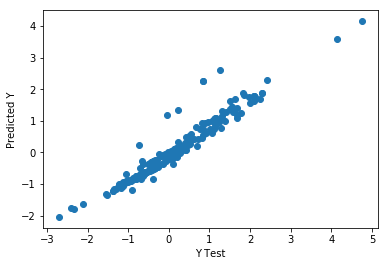

In [40]:
plt.scatter(Y_test,Y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [41]:
print(X_test)
print(Y_test)
print(Y_pred_test)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB
267     2.492502   1.339906              1.753847
142     2.340943   1.339906              1.273064
631     0.294889   0.228844             -1.019899
175     2.340943   1.339906              1.938764
482     0.143329   0.228844              0.311499
320     0.143329   0.228844              1.827814
579    -0.538689  -0.882218             -0.613083
94     -0.084010   0.228844              0.385466
104     2.644062   3.562029              1.568931
49     -0.084010   0.228844             -0.354200
1004   -0.841808  -0.882218             -0.871966
331     1.431585   1.339906              1.457981
839    -0.084010   0.228844              0.126583
867    -0.084010   0.228844             -0.021350
383    -0.462909  -0.882218             -0.058334
680    -0.462909  -0.882218             -1.056882
716     0.673788   1.339906              0.348482
6      -0.841808  -0.882218             -0.206267
298    -0.084010   0.228844             -0.502133
